In [1]:
import pandas as pd
import numpy as np

## Data preparation

In [4]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"

In [5]:
!wget $data

--2021-09-21 19:50:57--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  4.08MB/s    in 0.3s    

2021-09-21 19:50:58 (4.08 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [105]:
df = pd.read_csv('ch-2-data.csv')

In [106]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [107]:
# make the headers consistent
df.columns=df.columns.str.lower().str.replace(' ','_')

In [108]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [88]:
# make the string content consistent, check the strings first
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [109]:
#interested in the Object dtype 
string_indexes = list(df.dtypes[df.dtypes == 'object'].index)

In [110]:
for col in string_indexes:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [111]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Explatory data analysis

In [112]:
for col in df.columns:
    print(col)
    print(df[col].head())
    print(df[col].nunique())
    print()

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object
48

model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object
914

year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64
28

engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object
10

engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64
356

engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64
9

transmission_type
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission_type, dtype: object
5

driven_wheels
0    rear_wheel_drive
1    rear_wheel_drive
2    rear_wheel_drive
3    rear_wheel_drive
4    rear_wheel_drive
Name: driven_wheels, dtype: object
4

number

### Distribution of price

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

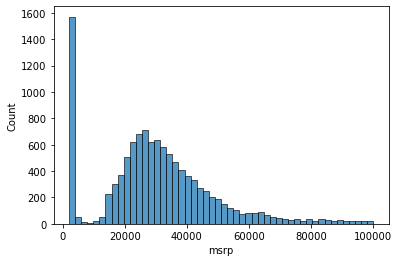

In [114]:
# bins is the num of bars
# price range
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [115]:
# the tail data (the ones that are very pricey will confuse the ML algo so they should be removed)
price_logs = np.log1p(df.msrp)

In [116]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

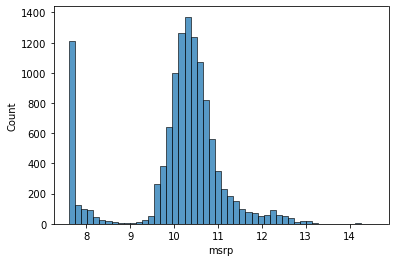

In [117]:
#the tail data is gone and the graph has a normal dstribution shape
sns.histplot(price_logs, bins=50)

#### Missing values

In [118]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting up the validation framework

In [43]:
# as discussed earlier, we divide the data into three: training, validation 20%, and testing 20%. 
# we formulate X and y for all of them

In [119]:
n = len(df)

n_val = int(n * 0.2)

n_test = int(n * 0.2)
n_train = int(n * 0.6)

In [120]:
n, n_val + n_test + n_train

(11914, 11912)

In [121]:
# there was scalling up or down when doing the multiplication so we do it this way

n_train = n - n_val - n_test 

In [122]:
#now they are equal
n, n_val + n_test + n_train

(11914, 11914)

In [123]:
#let's generate a number for shuffling
index = np.arange(n)
# seed is needed so that the random numbers are similar with the instructor
np.random.seed(2)
np.random.shuffle(index)


In [124]:
index

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [125]:
index[n_train:]

array([2779, 3708, 4794, ..., 6637, 2575, 7336])

In [126]:
# getting the data set with a range
# we need to shuffle the data so that it isn't concentrated on just one type

df_train =  df.iloc[index[:n_train]]
df_val = df.iloc[index[n_train:n_train+n_val]]
df_test = df.iloc[index[n_train+n_val:]]


In [67]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [127]:
# reset the index to start from 0 so that it is easier to work with
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [128]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [129]:
# apply log trasnformation 1P -> plus 1 and change to numpy array

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [130]:
# delete the msrp col because it isn't needed
# this should only be run once. when running again, it will trhow errors 
# because we are telling it to access a deleted col
del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

## Linear Regression

<p> to make it simple we will try to predict the price of one car: xi</p>

In [132]:
df_train .iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [142]:
# let's pick engine_hp, city_mpg and popularity
xi = [453,11,86]
# the equation formulas are in the video
# bias term 
w0 = 7.17
# our vector
w = [0.01,0.04,0.002]


In [143]:
def linear_regression(xi):
    
    n = len(xi)
    prediction = w0 
    
    for j in range(n):
        # the equation formula
        prediction = prediction + w[j] * xi[j]
        
    return prediction

In [144]:
linear_regression(xi)

12.312

In [147]:
np.expm1(12.312)

222347.2221101062

## Linear Regression vector form

In [154]:
# change the single xi to the X 
def dot(xi,w):
    n = len(xi)
    
    result = 0.0
    
    for j in range(n):
        result = result + w[j] * xi[j]
    return result

In [155]:
def linear_regression(xi):
        
    return w0 + dot(xi,w)

In [156]:
w_new = [w0] + w

In [157]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [160]:
def linear_regression(xi):
    xi = [1] + xi
        
    return dot(xi,w_new)

In [161]:
linear_regression(xi)

12.312

In [162]:
# matrix vector multiplication
# 1, hp, mpg,popularity

x1 = [1,148,24,1385]

x2 = [1,132,25,2031]

x10 = [1,453,11,86]

X = [x1,x2,x10]

X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [164]:
# we get a prediction for each car 
def linear_regression(X):
    return X.dot(w_new)

In [165]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## Training a Linear Regression model

In [186]:
# main function is at the bottom, these cells are examples

X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X


array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [175]:
''' 
ones = np.ones(X.shape[0])
ones
'''

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [176]:
'''
#stack colums together
X = np.column_stack([ones, X])
X
'''

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [177]:
'''
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
XTX_inv
'''

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [178]:
'''
# this confirms the inverse is correct, rounding is neccessary because the numbers are really small
XTX.dot(XTX_inv).round(1)
'''

array([[ 1., -0.,  0.,  0.],
       [ 0.,  1.,  0., -0.],
       [ 0.,  0.,  1.,  0.],
       [ 0., -0.,  0.,  1.]])

In [180]:
'''
w_full = XTX_inv.dot(X.T).dot(y)
'''

In [182]:
'''
w0 = w_full[0] 
w = w_full[1:] 
'''

In [183]:
'''
# negative values mean that for each extra year of a car, its price decreases
w0, w
'''

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [187]:
# formula is in the video
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [188]:
train_linear_regression(X, y)

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

## 2.8 Car price baseline model

In [189]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [192]:
base = ['engine_hp', 'engine_cylinders','highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].values

In [193]:
train_linear_regression(X_train,y_train)

(nan, array([nan, nan, nan, nan, nan]))

In [195]:
# the reason we have nan's is because we have missing values 
# we can fill them with 0s

X_train = df_train[base].fillna(0).values

In [198]:
w0,w = train_linear_regression(X_train,y_train)

In [201]:
y_predicition= w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

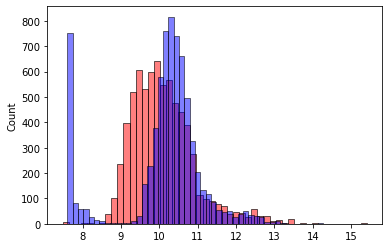

In [204]:
sns.histplot(y_predicition, color='red',alpha = 0.5, bins=50)
sns.histplot(y_train, color='blue',alpha = 0.5, bins=50)

In [205]:
# the graph left to right 
# left red is the prediction, right peak is the target
# it seems to predict less price but we need a strong judgmentive objective not just by looking at it

## 2.9 RMSE

In [206]:
# evaluating our model, formula from the video
# root mean squared error
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [207]:

rmse(y_train, y_predicition)

0.7554192603920132

## 2.10 Validating the model

In [208]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [209]:
#training part
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# validation part
X_val = prepare_X(df_val)
y_predicition = w0 + X_val.dot(w)
rmse(y_val, y_predicition)

0.7616530991301601

## 2.11 Simple feature engineering

In [210]:
def prepare_X(df):
    # copying the df to keep the original
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [211]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_predicition = w0 + X_val.dot(w)
rmse(y_val, y_predicition)
# the prediction went down from 0.7 to 0.5

0.5172055461058335

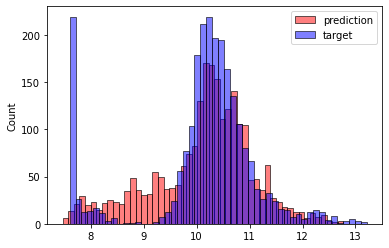

In [213]:
sns.histplot(y_predicition, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

## 2.12 Categorical variables

In [214]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [215]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']

    # change the boolean value to numbers and append it to the string with % 
    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [216]:

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

25.363586950342633

In [217]:
w0, w

(-1892716650172708.0,
 array([-1.25979400e-01, -4.11769415e+00, -1.49135423e+00, -1.20091264e+00,
        -1.87328446e-03, -1.15204727e+00, -1.38350480e+03, -1.39334362e+03,
        -1.39351243e+03,  9.15554192e-01,  2.06949015e+00, -3.70946478e+00,
        -3.60208641e+01, -7.60809203e-01,  6.99211474e+00,  4.21527311e+01,
         9.08207080e+00,  3.58850527e+00,  2.21686135e+02, -2.79986339e+01,
        -1.66096998e+01, -1.53650629e+01, -3.19971147e+01, -2.92630679e+01,
         1.89271665e+15,  1.89271665e+15,  1.89271665e+15,  1.89271665e+15,
        -8.15147229e-01, -3.70773744e+00, -9.46407895e+00, -9.25611606e+00,
        -2.25503056e+00, -3.23633762e+01, -2.12525262e+01, -9.46966711e+00,
        -1.44115660e-01, -2.62579827e-02,  1.75913981e-01,  3.65037816e-01,
        -2.90235596e-01]))

## 2.13 Regilarization
The model predicted error values when adding more categories, so we need to correct it

In [219]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001],
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [220]:
y= [1, 2, 3, 1, 2, 3]

In [221]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [222]:
XTX_inv = np.linalg.inv(XTX)

In [223]:
XTX_inv

array([[ 3.86409478e-02, -1.26839821e+05,  1.26839770e+05],
       [-1.26839767e+05,  2.88638033e+14, -2.88638033e+14],
       [ 1.26839727e+05, -2.88638033e+14,  2.88638033e+14]])

In [224]:
XTX_inv.dot(X.T).dot(y)


array([-1.93908875e-01, -3.61854375e+06,  3.61854643e+06])

In [225]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [226]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [227]:
 XTX = XTX + 0.01 * np.eye(3)

In [228]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [229]:

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [230]:

X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)
# the weight is getting lower

0.46082082859953855

## 2.14 Tuning the model

In [231]:
# finding the best regularization paraeter for linear regression model

for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 -1892716650172708.0 25.363586950342633
1e-05 3.675768972999673 0.46081532301176426
0.0001 7.13988135090329 0.46081536401298223
0.001 7.130829069375293 0.4608158583607256
0.1 7.000232395066559 0.46087365491186605
1 6.250747847621529 0.46158128382736274
10 4.729512585696531 0.4726098772668293


In [232]:
# training our model, we choose the value for r based on the values ^ 

r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.4608158583607256

## 2.15 Using the model

Train the model wit the training and validation data and check with the test data

In [233]:
# combining them into one
df_full_train = pd.concat([df_train, df_val])

df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train)

X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [234]:
y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.4600753968895705

In [235]:
# picking a random car
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [236]:
# prepariing the car data for the model function
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [237]:
X_small = prepare_X(df_small)

In [238]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.632492508668914

In [239]:
# taking out the log to get the price
np.expm1(y_pred)

41459.33676764502

In [240]:
np.expm1(y_test[20])

35000.00000000001